<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_3</h2>

<p> <b>Week: </b>3</p>
<p> <b>Author:</b> Pragati Koladiya </p> 
<p> <b>Tittle:</b> Assignment 3 </p>


<h1>Part 1</h1>
<h3>Logistic Regression</h3>
<ul>
    <li>It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. </li>
    <li>In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). </li>
    <li>In other words, the logistic regression model predicts P(Y=1) as a function of X. </li>

<h3>Import packages</h3>

In [1]:
#!pip install imblearn -U
#!pip install scikit-plot
#from scikitplot.estimators import plot_feature_importances
#from scikitplot.metrics import plot_confusion_matrix, plot_roc
#pip install --upgrade pip
#!pip install plotly


In [2]:
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import os
import pandas as pd
from pylab import rcParams
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import random
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
#from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC


from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

<h3>Acquire and load the data</h3>

In [3]:
#read data from google sheets 
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQvUPdZp-bRvGpHgVP2CEDvth9Jnm3FPnOXsAWKKsoG1wTfHvIG1Dr2vI9c8yJ8CK9PWMG-WZ1DhUYL/pub?gid=868333201&single=true&output=csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years,dept,salary
0,0.82,3,0.97,244,5,0,0,0,SALES,MEDIUM
1,0.75,2,0.81,247,4,0,0,0,HR,SMALL
2,0.54,4,0.81,257,2,0,0,0,ADMIN,SMALL
3,0.60,4,0.65,160,2,0,0,0,IS,SMALL
4,0.85,4,0.92,151,3,1,0,0,IS,MEDIUM


In [5]:
df.shape

(11249, 10)

<h3>
  <b> Dataset Information: </b> 
</h3>
<p> 
  <i>
  </i>
</p>
<ol style="list-style-type:squre;">
     <li><b>employee_satisfaction</b> - Employee Satisfaction between 0 and 1</li>
     <li><b>workload</b> - Workload range between 2 to 8</li>
     <li><b>last_performance_rating</b> - The last performance rating between 0 and 1 </li>
     <li><b>avg_montly_hours</b> - The average monthly hours of each employee</li>
     <li><b>tenure_years</b> - Number of years the employee has been working in the company.</li>
     <li><b>ergo_issues</b> - Ergo issues has binary values 0 = no issues and 1 = issues.</li>
     <li><b>attrit</b> -Attrit has columns value 0 and 1 if employee leaves the company it is 0 else 1</li>
     <li><b>promo_in_last_5_years</b> - The promotion is last 5 years has binary values.  </li>
     <li><b>dept</b> - There are 10 different departments </li>
     <li><b>salary</b> - There are three different categories of salary i.e small, medium and large.</li>  
</ol>

<h2>Data Exploration</h2>

- <p>Checking for missing values</p>

In [6]:
df.isnull().sum()

employee_satisfaction      0
workload                   0
last_performance_rating    0
avg_montly_hours           0
tenure_years               0
ergo_issues                0
attrit                     0
promo_in_last_5_years      0
dept                       0
salary                     0
dtype: int64

=> <i>Null values not found</i>

In [7]:
df.dtypes

employee_satisfaction      float64
workload                     int64
last_performance_rating    float64
avg_montly_hours             int64
tenure_years                 int64
ergo_issues                  int64
attrit                       int64
promo_in_last_5_years        int64
dept                        object
salary                      object
dtype: object

- <p>Describing quantitative variable</p>

In [57]:
df.describe()

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years,dept,salary
count,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000
mean,0.612957,3.799716,0.716225,201.176727,3.499600,0.144991,0.239577,0.021869,3.142324,0.601209
std,0.248235,1.232190,0.171378,50.058105,1.469892,0.352107,0.426844,0.146261,2.759233,0.640545
min,0.090000,2.000000,0.360000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,3.000000,0.560000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,4.000000,0.720000,201.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,5.000000,0.870000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000
max,1.000000,7.000000,1.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [8]:
df['workload'].unique()

array([3, 2, 4, 7, 5, 6])

In [9]:
df['tenure_years'].unique()

array([ 5,  4,  2,  3,  6,  7, 10,  8])

In [10]:
df['dept'].unique()

array(['SALES', 'HR', 'ADMIN', 'IS', 'TECH', 'PM', 'FIN', 'EXEC', 'MKT',
       'RTD'], dtype=object)

In [11]:
df['salary'].unique()

array(['MEDIUM', 'SMALL', 'LARGE'], dtype=object)

In [12]:
df['ergo_issues'].value_counts()

0    9618
1    1631
Name: ergo_issues, dtype: int64

In [13]:
df['attrit'].value_counts()

0    8554
1    2695
Name: attrit, dtype: int64

In [14]:
df['promo_in_last_5_years'].value_counts()

0    11003
1      246
Name: promo_in_last_5_years, dtype: int64

In [15]:
df.groupby('attrit').mean()

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,promo_in_last_5_years
attrit,,,,,,,
0,0.667108,3.779635,0.715087,198.999766,3.379238,0.175473,0.027473
1,0.441080,3.863451,0.719837,208.086456,3.881633,0.048237,0.004082


In [16]:
df.groupby('salary').mean()

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years
salary,,,,,,,,
LARGE,0.641470,3.748697,0.706277,199.499479,3.720542,0.156413,0.066736,0.059437
MEDIUM,0.621662,3.813622,0.717397,201.065222,3.529825,0.147988,0.205366,0.028896
SMALL,0.600189,3.796327,0.716933,201.571350,3.433792,0.140312,0.300459,0.008999


In [17]:
df.groupby('dept').mean()

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years
dept,,,,,,,,
ADMIN,0.620394,3.817802,0.724337,200.455197,3.403226,0.152330,0.246117,0.007168
EXEC,0.623368,3.867368,0.726989,202.092632,4.448421,0.172632,0.134737,0.113684
FIN,0.581554,3.830743,0.714266,199.780656,3.495682,0.119171,0.267703,0.018998
HR,0.599964,3.679279,0.716306,199.891892,3.335135,0.124324,0.277477,0.019820
IS,0.613293,3.802415,0.716169,201.703622,3.470911,0.132821,0.226125,0.003293
MKT,0.624050,3.695447,0.711272,199.547881,3.502355,0.160126,0.222920,0.053375
PM,0.620616,3.800587,0.712595,200.629032,3.472141,0.156891,0.227273,0.000000
RTD,0.617793,3.900175,0.715727,202.530648,3.397548,0.178634,0.157618,0.043783
SALES,0.614099,3.753066,0.707734,200.862169,3.523241,0.141059,0.250484,0.024532


In [18]:
df['attrit'].value_counts()

0    8554
1    2695
Name: attrit, dtype: int64

<h2>Graph</h2>

- <i>Bar plot to show the attrition</i>
<p>Reference: https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-python</p>

In [59]:
attrition = df[(df['attrit'] != 0)]
no_attrition = df[(df['attrit'] == 0)]

#count
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['#DAF7A6', '#76D7C4'],
        line=dict(color='#000000',width=1.0)))

layout = dict(title =  'Bar plot for attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

- <i>Pie chart to show percantage distribution of attrition</i>

In [74]:
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['attrit'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['#85C1E9','#F9E79F'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Percentage of attrition')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

=> <i>By observing pie chart it is apparent, 76% employees stayed back with the company whereas 24% employees left the company</i>

- <i>Workload Vs Atttrition</i>

In [22]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['attrit'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [23]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['attrit'] != 0)]
    tmp2 = df[(df['attrit'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['attrit']), )
    tmp3['attrit%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))
    
    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
       line=dict(color='#000000',width=1)))
    
    
    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1,trace2], layout=layout)
    py.iplot(fig)

In [24]:
plot_distribution('workload', True)
barplot('workload', True)

=> There is hight attrition amongst employees with less workload. Whereas, the attrition rate is low for employees with more workload so, factors a part from workload are influnsing the attrition rate.

- <i>Count plot by demartment</i>

[Text(0.5, 0, 'Department')]

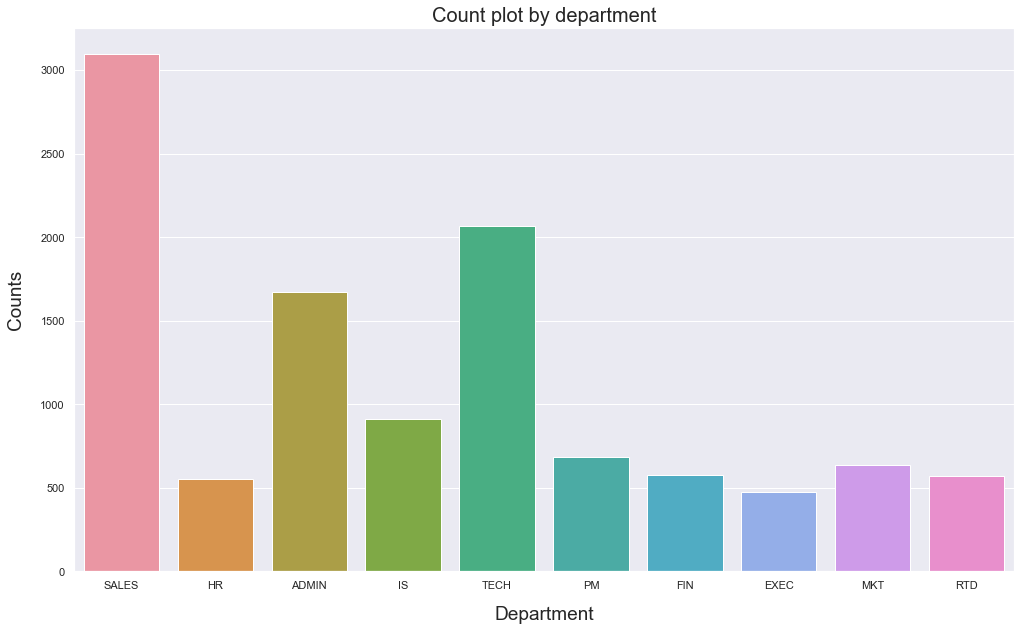

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='Set2')

plt.xlabel("Counts", labelpad = 15, fontsize=19)
plt.ylabel("Department", labelpad = 15, fontsize=19);

ax = sns.countplot(df['dept'])
plt.title("Count plot by department", fontsize=20)
ax.set(ylabel="Counts")
ax.set(xlabel="Department")

=> More than 3000 employees are from sales department.

- <p>Histogram to show frequency of employee satisfaction </p>

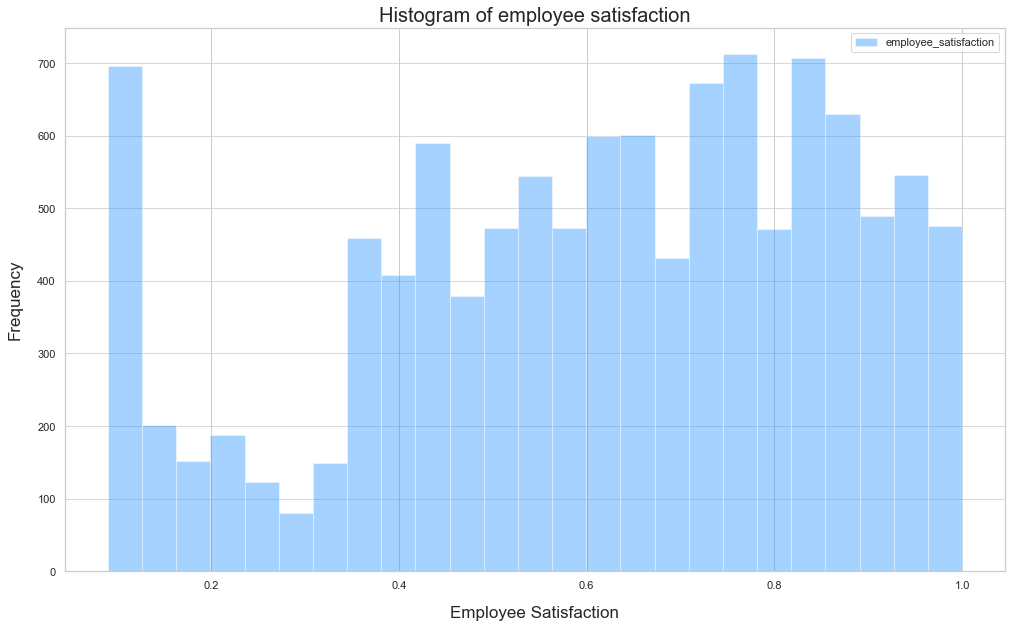

In [26]:
#Histogram 
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')

x1 = df['employee_satisfaction']
kwargs = dict(alpha=0.4, bins=25)
plt.grid(axis='y', alpha=0.75)
plt.hist(x1, **kwargs, color='dodgerblue', label='employee_satisfaction')

plt.title("Histogram of employee satisfaction", fontsize=20)
plt.xlabel("Employee Satisfaction", labelpad = 15, fontsize=17)
plt.ylabel("Frequency", labelpad = 15, fontsize=17)

plt.legend();



- <i>Distribution plot of employee stisfaction </i>

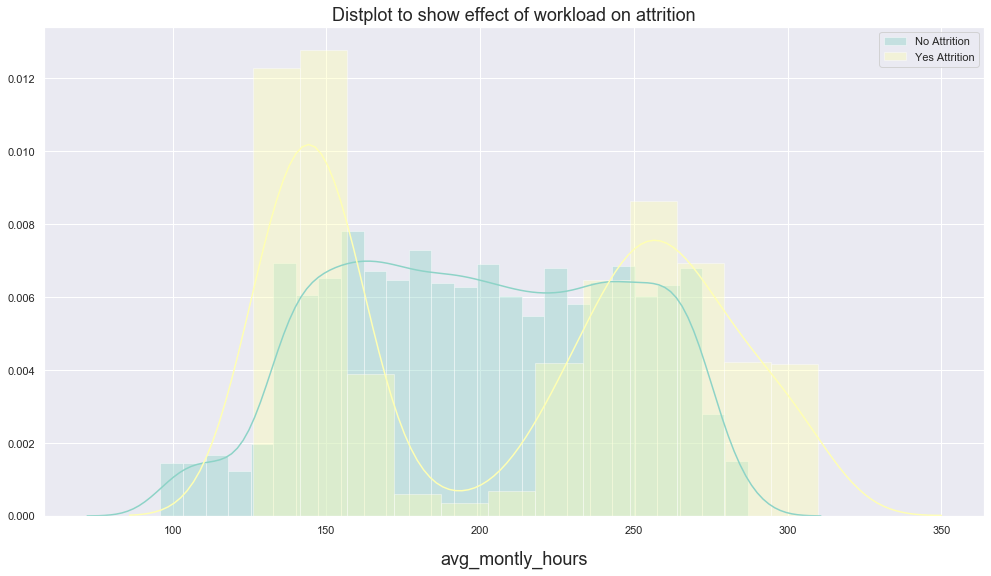

In [27]:
data0 = df['avg_montly_hours'].loc[df['attrit']==0]
data1 = df['avg_montly_hours'].loc[df['attrit']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(style='whitegrid')
sns.set(palette='Set3')

ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)

plt.title("Distplot to show effect of workload on attrition", fontsize=18)
plt.xlabel("avg_montly_hours", labelpad = 15, fontsize=18)

plt.legend(['No Attrition','Yes Attrition'])

=> Employee with high average monthly hours have high tendency to leave the company 

- <i>Cat plot to show promotion in last five years vs attrition differenciated by salary</i>

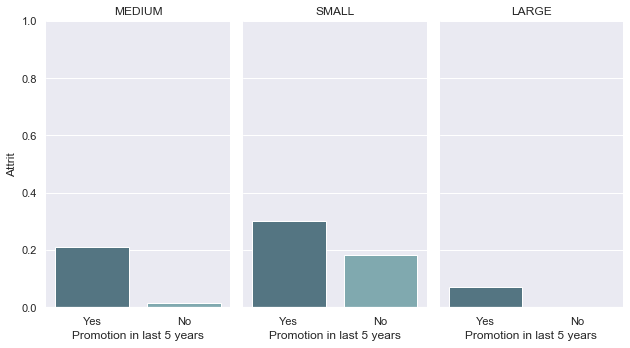

<Figure size 1080x864 with 0 Axes>

In [28]:
#salary promo attrit

g = sns.catplot(x="promo_in_last_5_years", y="attrit", col="salary",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6, palette="GnBu_d")
plt.figure(figsize=(15,12))
(g.set_axis_labels("Promotion in last 5 years", "Attrit")
  .set_xticklabels(["Yes", "No"])
  .set_titles("{col_name}")
  .set(ylim=(0, 1))
  .despine(left=True)) 

- <i>Bar plot to show employee satisfaction and last performance rating vs attrition which is hue by salary</i>

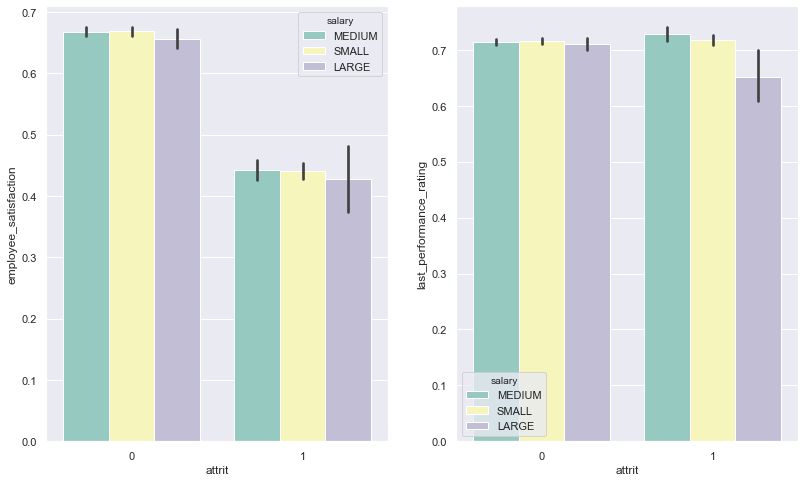

In [29]:
#on the basis of salary
sns.set(palette='Set3')

columns = ["employee_satisfaction","last_performance_rating"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'attrit', y = df[i], hue="salary", data =df)

#plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

=> It can be observed that the employees with hefty salaries are less satisfied compared to employees with mediocre salaries. Ironically, their attrition rate is also low which might be explained with the hefty salaries they get.

- <i>Bar plot to show salary and ergo issues vs attrition differenciated by tenure year</i>

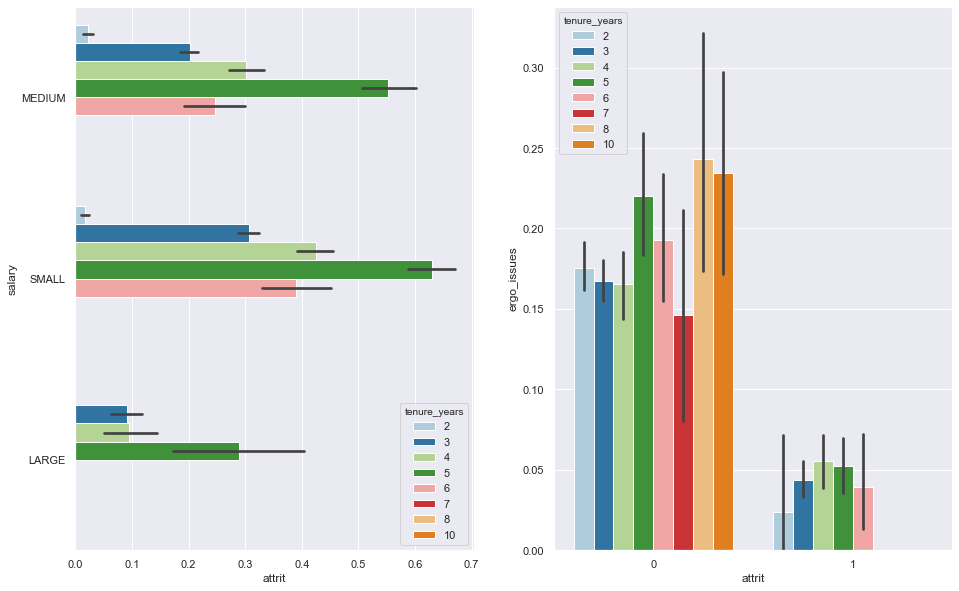

In [30]:
sns.set(palette='Paired')

columns = ["salary","ergo_issues"]
plt.figure(figsize=(14,10))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'attrit', y = df[i], hue="tenure_years", data =df)

#plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

<p>=>Employees who have small salaries and high tenure years have the highest attrition rate. </p>
=>Employees who have maximum ergonomical issues also have the highest tenure years but their attrition rate is 0.

<h3>Lable encoding</h3>

- <i>Label Encoding refers to converting the labels into numeric form.</i>

In [33]:
#encoding of categorical data using replace() function
replace_map = {'dept': {'SALES': 0, 'HR': 1,'ADMIN':2,'IS':3,'TECH':4,'PM':5,'FIN':6,'EXEC':7,'MKT':8,'RTD':9}}
df.replace(replace_map, inplace=True)

In [34]:
#encoding of categorical data using replace() function
replace_map = {'salary': {'SMALL': 0, 'MEDIUM': 1,'LARGE':2}}
df.replace(replace_map, inplace=True)

<h3>Feature score</h3>


- <i>It helps to identify the import features from the dataset by providing scores</i>

In [66]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range

X =df.iloc[:,df.columns != 'attrit' ]
y =df.attrit
X.head()

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features


                  Features       Score
3         avg_montly_hours  841.100333
5              ergo_issues  228.819996
8                   salary  200.689392
0    employee_satisfaction  170.808239
4             tenure_years  147.803966
7                     dept   57.699428
6    promo_in_last_5_years   51.272746
1                 workload    3.788894
2  last_performance_rating    0.064564


- <i>Graphical representaion of feature importance for predicting attrition</i>

[0.26836324 0.25659235 0.11605744 0.12222315 0.17741867 0.01492027
 0.00300028 0.02312537 0.01829923]


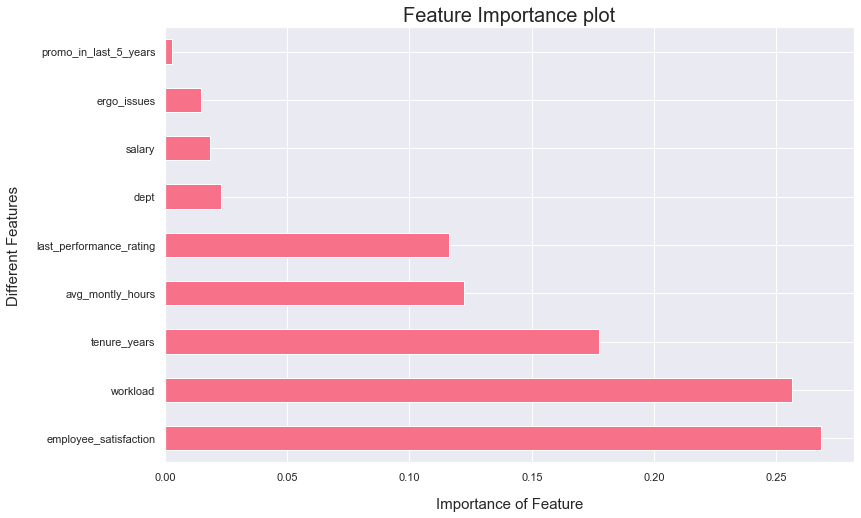

In [36]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.set(style='whitegrid')
sns.set(palette='husl')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')

plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Different Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

=> After observing feature score it is apparent, there are mainly top five feature which has the highest corelation with attrition but here I am going to select all the features to predict that employee's attrition as there are less number of features. 

- <i><b>Creating logistic regression</b></i>

- <i>Now, set the independent variables (represented as X) and the dependent variable (represented as y):</i>

In [37]:
X = np.array(df.loc[:, df.columns != 'attrit'])
y = np.array(df.loc[:, df.columns == 'attrit'])

print('Shape of X: {}'.format(X.shape))
print('Shape of Y: {}'.format(y.shape))

Shape of X: (11249, 9)
Shape of Y: (11249, 1)


- <i>Then, apply train_test_split. For example, you can set the test size to 0.3, and therefore the model testing will be based on 30% of the dataset, while the model training will be based on 70% of the dataset:</i>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (7874, 9)
Number transactions y_train dataset:  (7874, 1)
Number transactions X_test dataset:  (3375, 9)
Number transactions y_test dataset:  (3375, 1)


<h3>Synthetic Minority Oversampling Technique(SMOTE)</h3>
<ul>
 <li>SMOTE uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.</li>
 <li>SMOTE synthesises new minority instances between existing (real) minority instances. </li>
 <li>As we have seen bar graph of attrition majority of the data belongs to no attrition so, to balance the data I have used SMOTE technique.</li>
</ul>

In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state=2)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

X_test_res, y_test_res = smote.fit_sample(X_test,y_test)


Before OverSampling, counts of label '1': [1898]
Before OverSampling, counts of label '0': [5976] 

After OverSampling, the shape of train_X: (11952, 9)
After OverSampling, the shape of train_y: (11952,) 

After OverSampling, counts of label '1': 5976
After OverSampling, counts of label '0': 5976


- <i>Let us see how baseline logistic regression model performs on synthetic data points.</i>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test_res)

<h4>Accuracy of model</h4>

In [41]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_res, y_test_res)))

Accuracy of logistic regression classifier on test set: 0.80


<h4>Cross validation prediction of smoth_model</h4>

In [42]:
#Cross validation prediction
cv_pred = cross_val_predict(logreg,X_test_res,y_test_res,cv=5)
#Cross validation score
cv_score = cross_val_score(logreg,X_test_res,y_test_res,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7870489952585233


<h4> Classification Report</h4>

In [43]:
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2578
           1       0.78      0.84      0.81      2578

    accuracy                           0.80      5156
   macro avg       0.80      0.80      0.80      5156
weighted avg       0.80      0.80      0.80      5156



In [44]:
#logistic model with summary
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.431480
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.216    
Dependent Variable: y                AIC:              9725.4390
Date:               2020-05-03 09:15 BIC:              9791.3913
No. Observations:   11249            Log-Likelihood:   -4853.7  
Df Model:           8                LL-Null:          -6193.6  
Df Residuals:       11240            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -4.0018     0.1053   -38.0064   0.0000   -4.2082   -3.7954
x2      -0.2997     0.0246   -12.2049   0.0000   -0.3479   -0.2516
x3 

<h4>Confusion Matrix</h4>

- <i>It helps to asses the performance of classifier</i>

In [45]:
confusion_matrix = confusion_matrix(y_test_res, y_pred)
print(confusion_matrix)

[[1959  619]
 [ 419 2159]]


<P>=>True Positive(TP)= 1959</P>
<P>=>True Negative(TN)= 2159</P>
<P>=>False Positive(FP)= 619</P>
<P>=>False Negative(NP)= 419</P>

- <i>Heat map of confusion matrix</i>

Text(24.1, 0.5, 'Actual label')

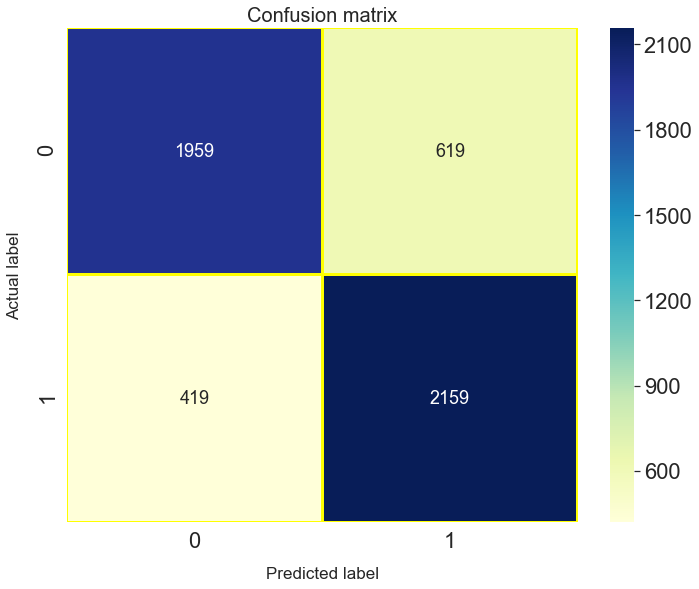

In [47]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

<h4>Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve</h4>

ROC score is: 0.7986811481768813


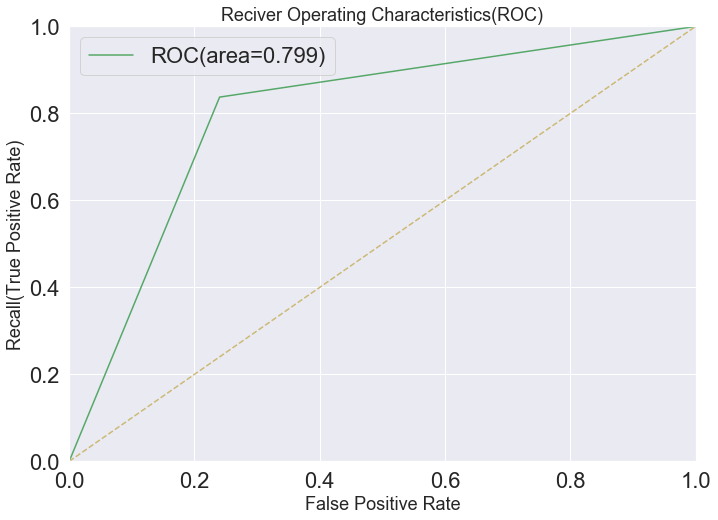

AUC: 0.7986811481768813


In [48]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test_res,y_pred)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test_res,y_pred)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>Testing model using sample data</h2>

In [49]:
logreg.predict(X_test_res)

array([0, 0, 0, ..., 0, 1, 1])

In [50]:
logreg.score(X_test_res,y_test_res)

0.7986811481768813

In [51]:
logreg.predict_proba(X_test_res)

array([[0.62281738, 0.37718262],
       [0.92020629, 0.07979371],
       [0.7702957 , 0.2297043 ],
       ...,
       [0.89968888, 0.10031112],
       [0.23954183, 0.76045817],
       [0.0643372 , 0.9356628 ]])

- <i>Generated five sample predictions for input values of my choose</i>

In [71]:
#Now, let's use the model to predict funeral plot purchases for arbitray values
arbitrary_values1 = pd.DataFrame(data = {'employee_satisfaction':[0.90,0.90,0.75,0.89,0.09]})
arbitrary_values2 = pd.DataFrame(data = {'workload': [1,6,6,7,6]})
arbitrary_values3 = pd.DataFrame(data = {'last_performance_rating':[0.74,0.77,0.9,1,0.46]})
arbitrary_values4 = pd.DataFrame(data = {'avg_montly_hours':[152,152,210,247,192]})
arbitrary_values5 = pd.DataFrame(data = {'tenure_years': [5,5,5,2,5]})
arbitrary_values6 = pd.DataFrame(data = {'ergo_issues':[0,1,1,1,0]})
arbitrary_values7 = pd.DataFrame(data = {'promo_in_last_5_years':[0,1,0,1,1]})
arbitrary_values8 = pd.DataFrame(data = {'salary': [1,0,1,2,0]})
arbitrary_values9 = pd.DataFrame(data = {'dept':[1,2,1,1,8]})

arbitrary_values_merged = arbitrary_values1.join(arbitrary_values2).join(arbitrary_values3).join(arbitrary_values4).join(arbitrary_values5).join(arbitrary_values6).join(arbitrary_values7).join(arbitrary_values8).join(arbitrary_values9).set_index([pd.Index(arbitrary_values1.index)])
arbitrary_values_merged

final_df = arbitrary_values_merged.join(pd.DataFrame(logreg.predict(arbitrary_values_merged), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values_merged.index)]))
final_df

,employee_satisfaction,workload,last_performance_rating,avg_montly_hours,tenure_years,ergo_issues,promo_in_last_5_years,salary,dept,Prediction
0,0.90,1,0.74,152,5,0,0,1,1,1
1,0.90,6,0.77,152,5,1,1,0,2,0
2,0.75,6,0.90,210,5,1,0,1,1,0
3,0.89,7,1.00,247,2,1,1,2,1,0
4,0.09,6,0.46,192,5,0,1,0,8,0


<h1>Observation</h1>

<p>=> Above table contains sample data and predicted attrition values for different features. </p>
<p>=> It is apparent that employees with more workload have higher performance rating and they are also less likely to leave the company.</p>
<p>=> On the other hand, employees performing poorly who have long tenure are most likely to leave the company. </p>

<h4>Summary of model performance:</h4>

<p>=> Accuracy of logistic regression classifier on test set: <b>0.80</b></p>
<p>=> Cross validation score : <b>0.7870489952585233</b></p>
<p>=> Macro avg:  
<ul>  
    <li>precision 0.80 </li> 
    <li>recall    0.80 </li>  
    <li>f1-score   0.80 </li>
    <li>support    5156 </li>
</p>
<p>=> Confussion Matrix : <b>{[1959 , 619]</b>
 <b>[ 419 , 2159]}</b></p>
<p>=> ROC score is: <b>0.798</b></p>
<p>=> AUC: <b>0.7986811481768813</b></p>

<h1>Reference</h1>
<p>[1]https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-python</p>